# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#Cek nilai unik dalam kolom "no"
#Jika kolom 'no' hanya berisi nilai NaN maka kita dapat hapus kolom tersebut
print(data['no'].unique())

[nan]


In [ ]:
#Drop data yang tidak diperlukan
data=data.drop('no', axis = 1) #Menghapus kolom "no" dari DataFrame
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
#Memberikan informasi terkait dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5000 non-null   int64
 1   y       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


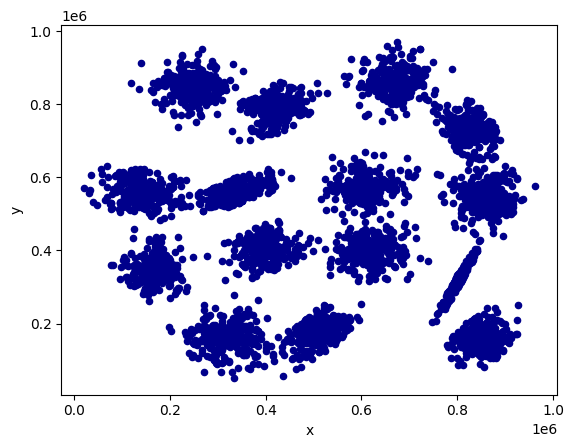

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

Optimal Number of Clusters: 15


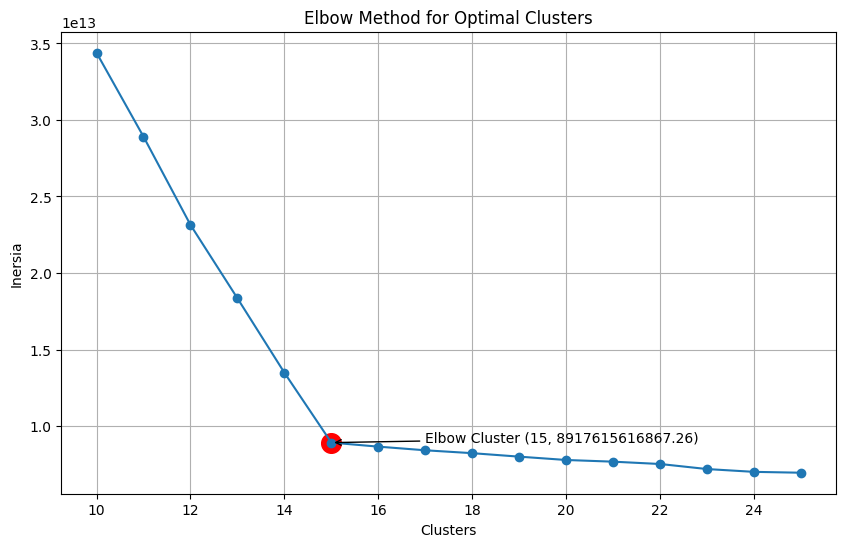

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from warnings import filterwarnings as fw
fw('ignore')

# Inisialisasi array untuk menyimpan nilai inersia
inertia_values = []

# Melakukan iterasi untuk mencari jumlah cluster terbaik
for num_clusters in range(10, 26):
    # Inisialisasi model KMeans dengan jumlah cluster tertentu
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Melakukan clustering pada data
    kmeans.fit(data)

    # Menyimpan nilai inersia pada setiap iterasi
    inertia_values.append(kmeans.inertia_)

# Plot hasil inersia untuk menentukan jumlah cluster terbaik
plt.figure(figsize=(10, 6))
plt.plot(range(10, 26), inertia_values, marker='o', linestyle='-')
plt.xlabel('Clusters')
plt.ylabel('Inersia')
plt.title('Elbow Method for Optimal Clusters')

# Menandai titik elbow pada grafik dengan warna merah
elbow_cluster = 15
plt.scatter(elbow_cluster, inertia_values[elbow_cluster-10], c='red', marker='o', s=200)
plt.annotate(f'Elbow Cluster ({elbow_cluster}, {inertia_values[elbow_cluster-10]:.2f})',
             xy=(elbow_cluster, inertia_values[elbow_cluster-10]),
             xytext=(elbow_cluster + 2, inertia_values[elbow_cluster-10] + 10000),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Menambahkan grid pada plot
plt.grid(True)

# Menampilkan jumlah cluster terbaik
best_cluster = 15
print(f"Optimal Number of Clusters: {best_cluster}")

# Menampilkan plot
plt.show()

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
#Menggunakan jumlah cluster terbaik untuk evaluasi
kmeans = cluster.KMeans(n_clusters=best_cluster, random_state=0) #Menginisialisasi model KMeans dengan jumlah cluster terbaik
kmeans.fit(data[['x', 'y']]) #Melatih model dengan menggunakan kolom 'x' dan 'y' dari data
label = kmeans.labels_ #Mendapatkan label cluster untuk setiap titik data
#END CODE

#Menghitung Silhouette Score sebagai evaluasi jumlah klaster terbaik
score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label #Menambahkan kolom 'cluster' ke dalam DataFrame 'result' dengan nilai label cluster
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


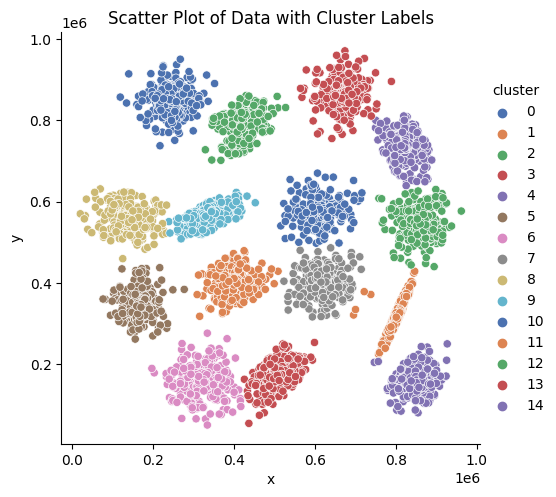

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='deep') #Membuat scatter plot dengan sumbu x diambil dari kolom 'x', sumbu y dari kolom 'y',
                                                                      #dan warna cluster diambil dari kolom 'cluster', lalu palet warna 'deep' digunakan
                                                                      #untuk menentukan skema warna yang berbeda untuk setiap cluster
plt.title('Scatter Plot of Data with Cluster Labels')  #Menambahkan judul untuk scatter plot
plt.show() #Menampilkan scatter plot
#END CODE